In [12]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [13]:
hidden_states = np.load("../data/encoded_states.npy")
train_targets = np.load("../data/simulated/train_targets.npy")

In [14]:
original_states = np.load("../drawing/simulated/train_decoder_states.npy")
original_latent = np.load("../drawing/simulated/latent/train_latent.npy")
print(original_states.shape)
print(original_latent.shape)

(6, 2, 5600, 400)
(6, 5600, 3)


In [15]:
where_zero = np.where(train_targets == 0)[0]
where_one = np.where(train_targets == 1)[0]


In [5]:
n_which_2 = 2500
which_2 = [0]*n_which_2

for i in range(n_which_2):
    start = 40
    if (i%2) == 1:
        which_2[i] = [int(where_zero[start+i]), "proton"]
    else:
        which_2[i] = [int(where_one[start+i]), "carbon"]

In [17]:
where_one.shape

(2806,)

<IPython.core.display.Javascript object>


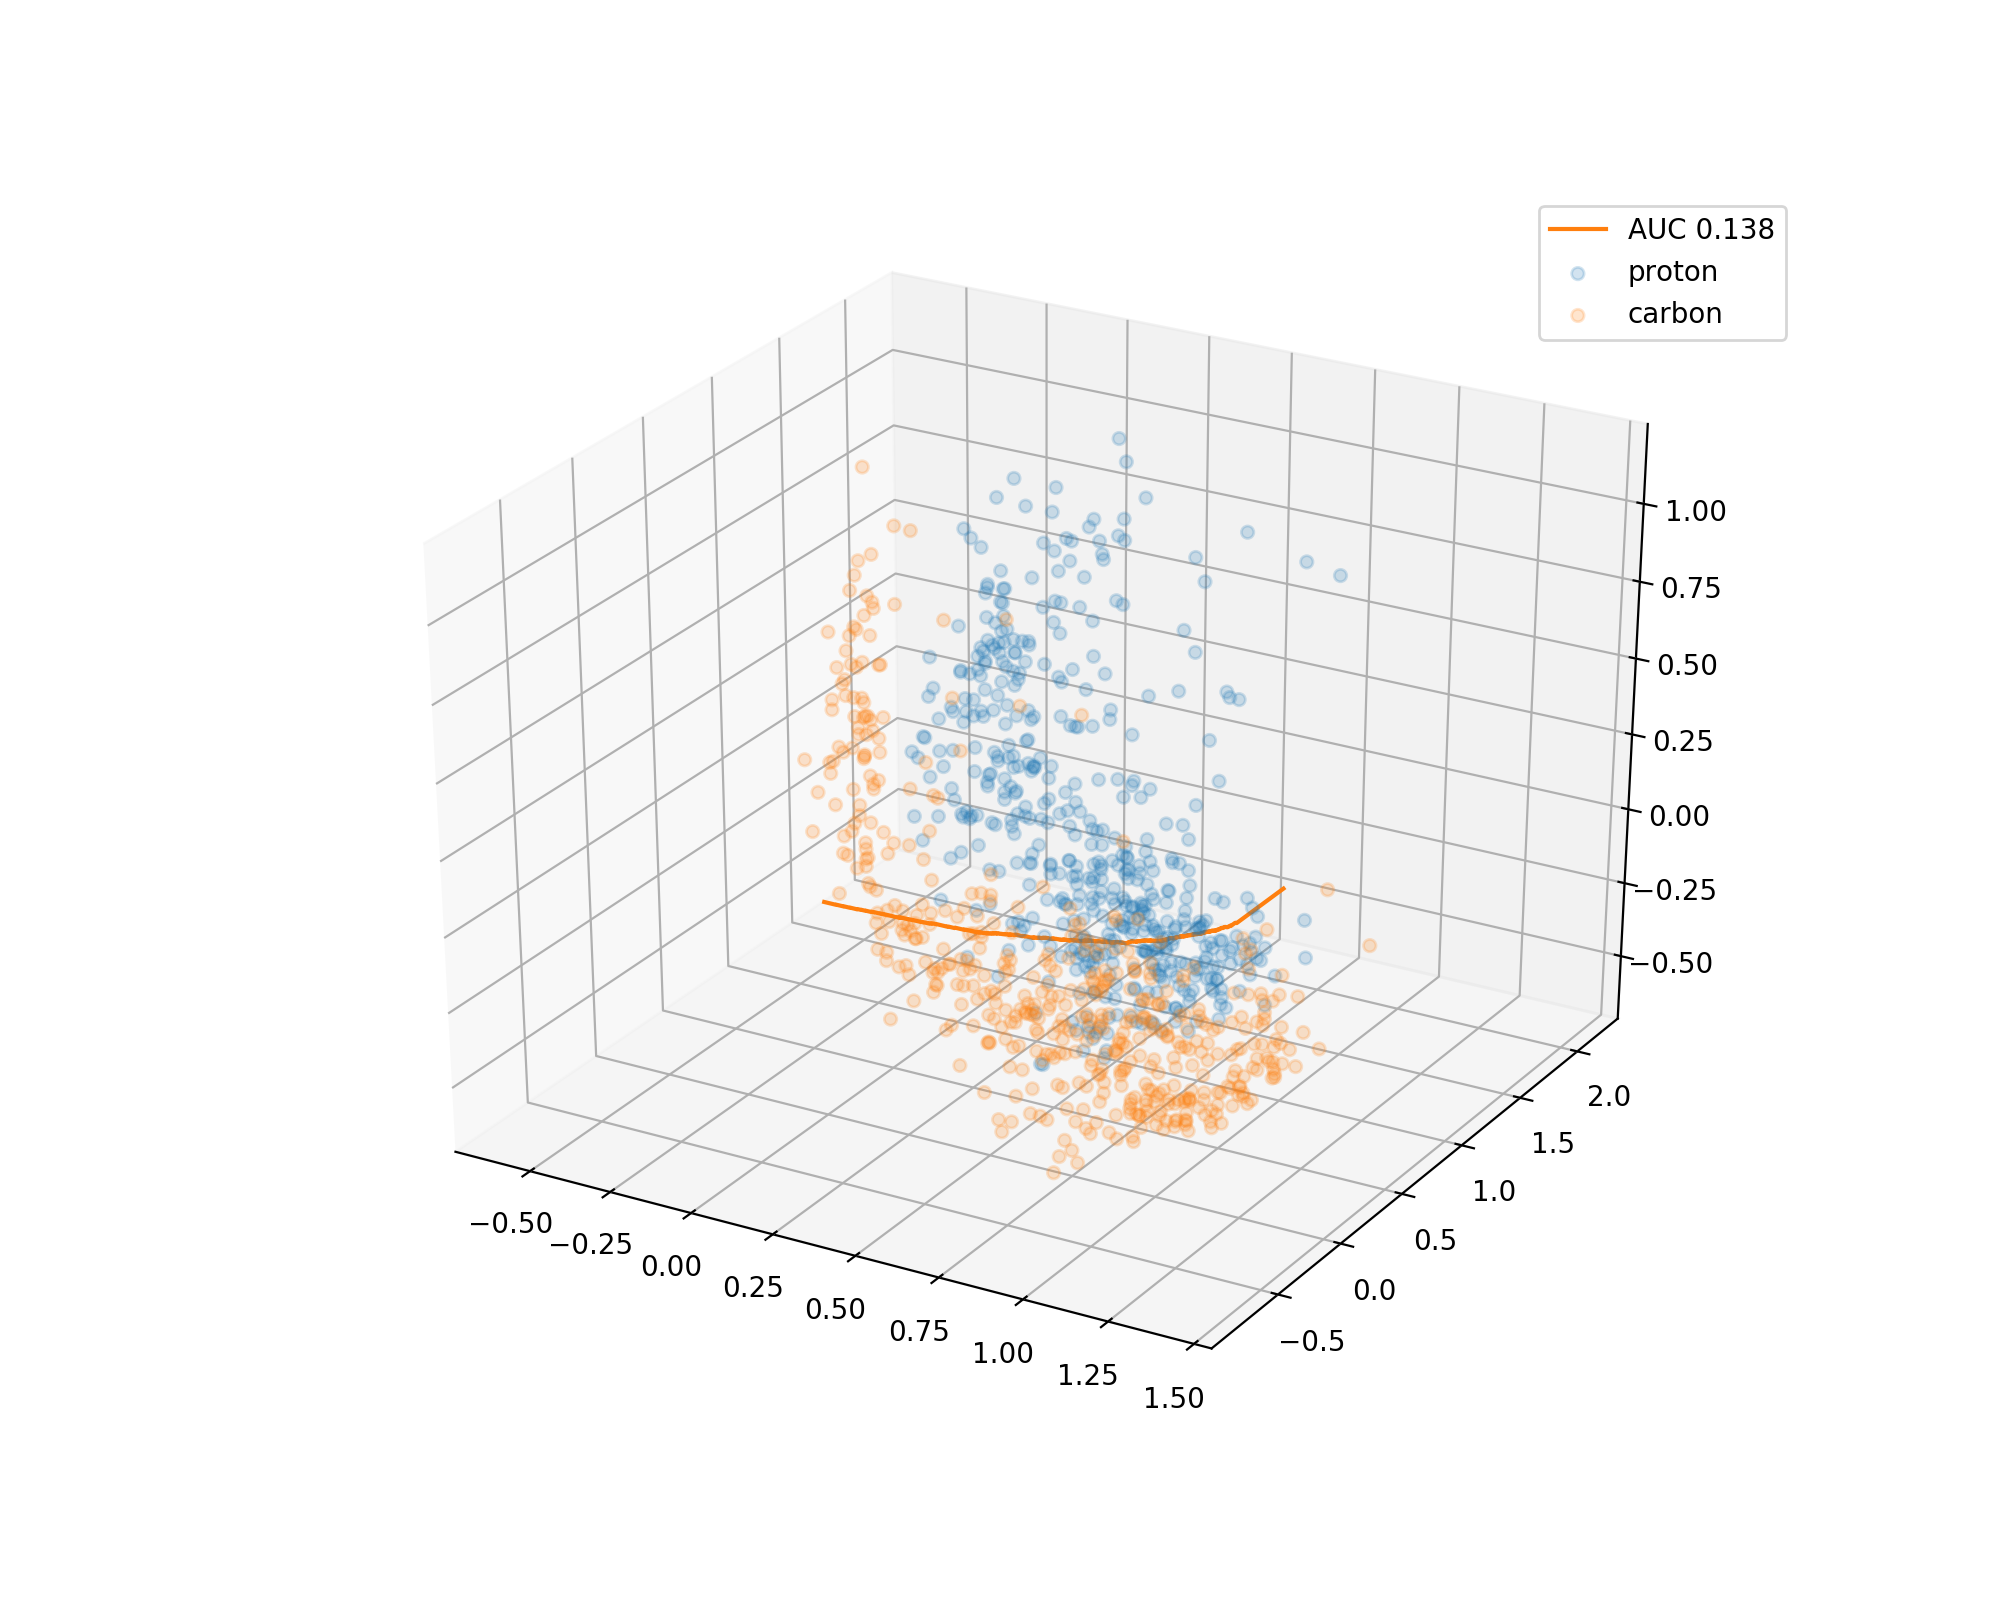

In [38]:
%matplotlib notebook

#fig, axs = plt.subplots(nrows=original_latent.shape[0], figsize=(10, 20), sharex=True, sharey=True)
fig = plt.figure(figsize=(10, 8))
events = [(original_latent[:, i, :], type_event) for i, type_event in which_2]

all_proton = original_latent[:, where_zero[0:500], :]
all_carbon = original_latent[:, where_one[0:500], :]

for i in range(1):#original_latent.shape[0]):
    ax = fig.add_subplot(
            1,#original_latent.shape[0],
            1,
            i+1,
            projection="3d"
        )
    
    i = 0

    proton = all_proton[i, :, :]
    carbon = all_carbon[i, :, :]
    
    events = [proton, carbon]
    colors = ["xb", "xr"]
    legends = ["proton", "carbon"]
    
    for i in range(2):
        event = events[i]
        color = colors[i]
        legend = legends[i]
        
        x = event[:, 0]
        y = event[:, 1]
        z = event[:, 2]
        
        ax.scatter(x, y, z, color, label=legend, alpha = 0.2)
        
plt.legend()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
                                        original_latent[1, :, :].reshape((-1, 3)),
                                        train_targets
                                        )

X_train2, X_test2, y_train2, y_test2 = train_test_split(
                                        original_latent[0:2, :, :].reshape((-1, 6)),
                                        train_targets
                                        )

In [58]:
train_onehot = OneHotEncoder(sparse=False).fit_transform(train_targets.reshape((-1, 1)))

/home/robert/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [68]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

model2 = LogisticRegression()
model2.fit(X_train2, y_train2)


/home/robert/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/robert/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

<IPython.core.display.Javascript object>


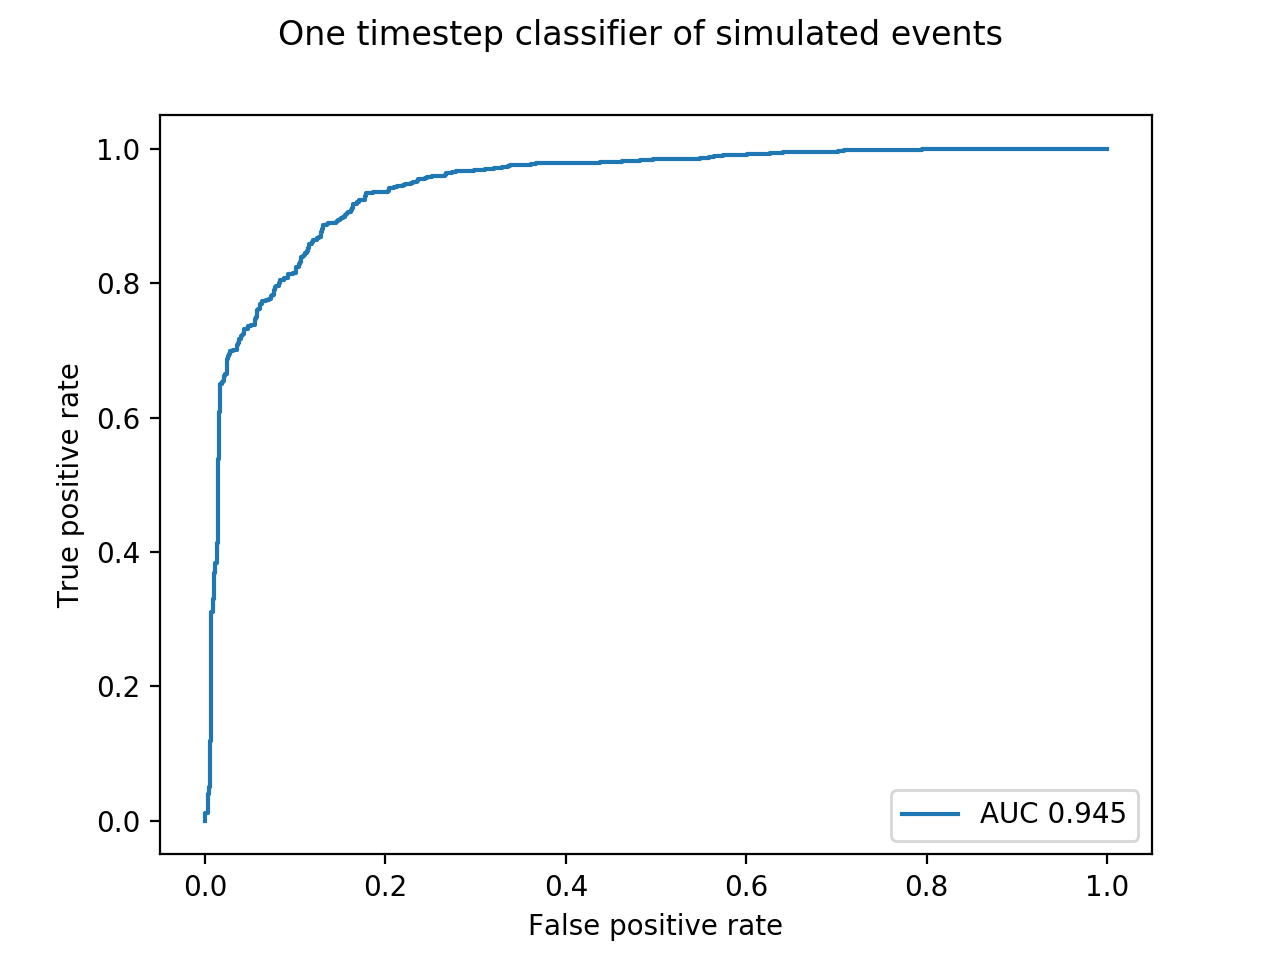

In [69]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

predicted = model.predict_proba(X_test)[:,1]
class_predicted = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, predicted)

fig, ax = plt.subplots()

fig.suptitle("One timestep classifier of simulated events")

ax.plot(fpr, tpr, label="AUC {:.3f}".format(roc_auc_score(y_test, predicted)))
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")

plt.legend()

<IPython.core.display.Javascript object>


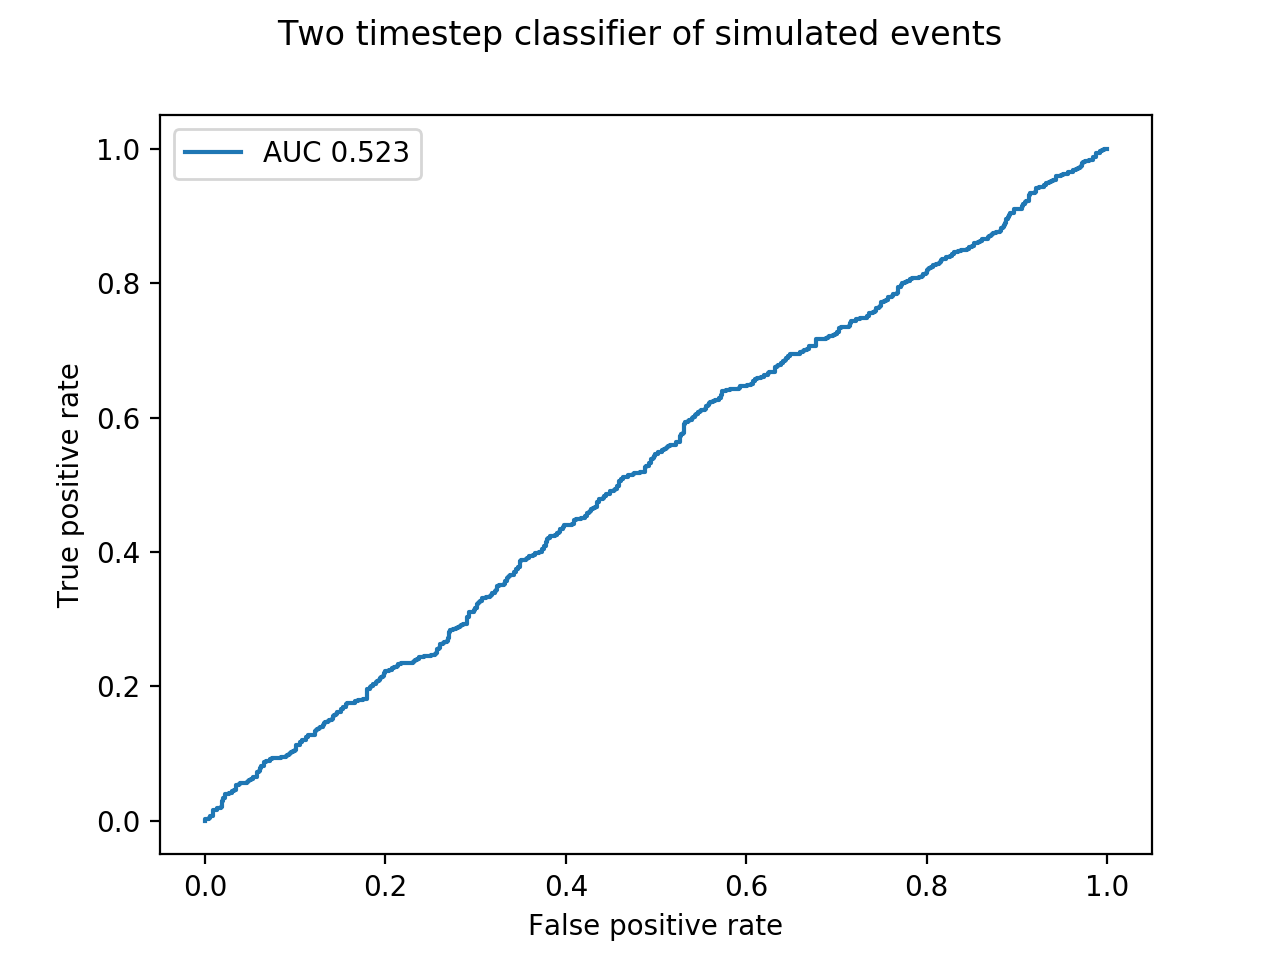

In [72]:
predicted2 = model2.predict_proba(X_test2)[:,1]
class_predicted2 = model2.predict(X_test2)

fpr2, tpr2, thresholds2 = roc_curve(y_test2, predicted2)

fig, ax = plt.subplots()

fig.suptitle("Two timestep classifier of simulated events")

ax.plot(fpr2, tpr2, label="AUC {:.3f}".format(roc_auc_score(y_test2, predicted2)))
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")

plt.legend()